In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [ ]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

In [ ]:
X=df.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True)

In [ ]:
scaler= StandardScaler()
X=scaler.fit_transform(X)
X_new=pd.DataFrame(normalize(X))
X_new.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new=pca.fit_transform(X_new)
X_new = pd.DataFrame(X_new)
X_new.columns='C1','C2'
X_new.head()

,C1,C2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481657,-0.097611
4,-0.563512,-0.482505


In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X_new)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

array([0.22270354, 0.34844001, 0.42885645])

In [ ]:
gm.means_

array([[-0.36127408,  0.52994364],
       [-0.42239485, -0.30477819],
       [ 0.53079833, -0.02756962]])

In [ ]:
gm.covariances_

array([[[ 0.10139434,  0.03542391],
        [ 0.03542391,  0.06488322]],

       [[ 0.07770304, -0.03147434],
        [-0.03147434,  0.05484877]],

       [[ 0.05205846,  0.01663584],
        [ 0.01663584,  0.1190574 ]]])

In [ ]:
gm.converged_

True

In [ ]:
labels=gm.predict(X_new)
labels

array([1, 0, 2, ..., 2, 1, 2])

In [ ]:
gm.predict_proba(X_new)

array([[7.94998229e-06, 9.99809821e-01, 1.82228674e-04],
       [9.99087563e-01, 9.10981139e-04, 1.45605889e-06],
       [1.19578933e-02, 7.61331875e-06, 9.88034493e-01],
       ...,
       [4.61727875e-05, 9.65434240e-02, 9.03410403e-01],
       [5.71657905e-03, 9.92857783e-01, 1.42563747e-03],
       [1.88409454e-01, 8.33201888e-02, 7.28270357e-01]])

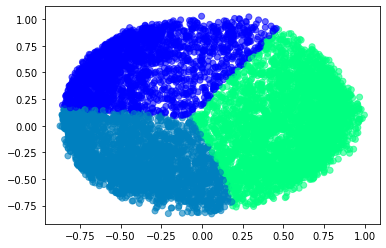

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_new['C1'],X_new['C2'], c=labels,cmap=plt.cm.winter,alpha=0.6)
plt.show()

In [ ]:
X_samp,Y_samp = gm.sample(5)
print(X_samp,Y_samp)

[[-0.77661991  0.34842033]
 [-0.38858853 -0.52221794]
 [ 0.53370575 -0.19368474]
 [ 0.77767267  0.63301055]
 [ 0.21864363  0.13293744]] [0 1 2 2 2]


In [ ]:
densities=gm.score_samples(X_new)

In [ ]:
density_threshold = np.percentile(densities,2)
anomaly = X_new[densities<density_threshold]
print("possible number of frauds:",end=" ")
print(len(anomaly))

possible number of frauds: 179
